# Fitting

In [2]:
import sys
sys.path.insert(0, '../../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle as pkl
import tensorflow as tf

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from kraus_channels import KrausMap, DilutedKrausMap
from loss_functions import ProbabilityMSE, ProbabilityRValue, channel_fidelity_loss, SpectrumDistance
from optimization import ModelSPAM, ModelQuantumMap, Logger, model_saver
from quantum_channel import DilutedChannel, ChoiMapStatic
from quantum_tools import apply_unitary, measurement, resample, state_fidelity, generate_unitary
from experimental import counts_to_probs, generate_pauliInput_circuits, generate_pauli_circuits
from spam import SPAM, InitialState, POVMwQR as POVM, IdealPOVM, IdealInit, povm_fidelity, CorruptionMatrix
from synthetic_data import generate_spam_data, generate_map_data
from utils import saver, loader, train_val_split
from quantum_circuits import pqc_basic
from spectrum import channel_spectrum, mean_spacing


#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## L = 8

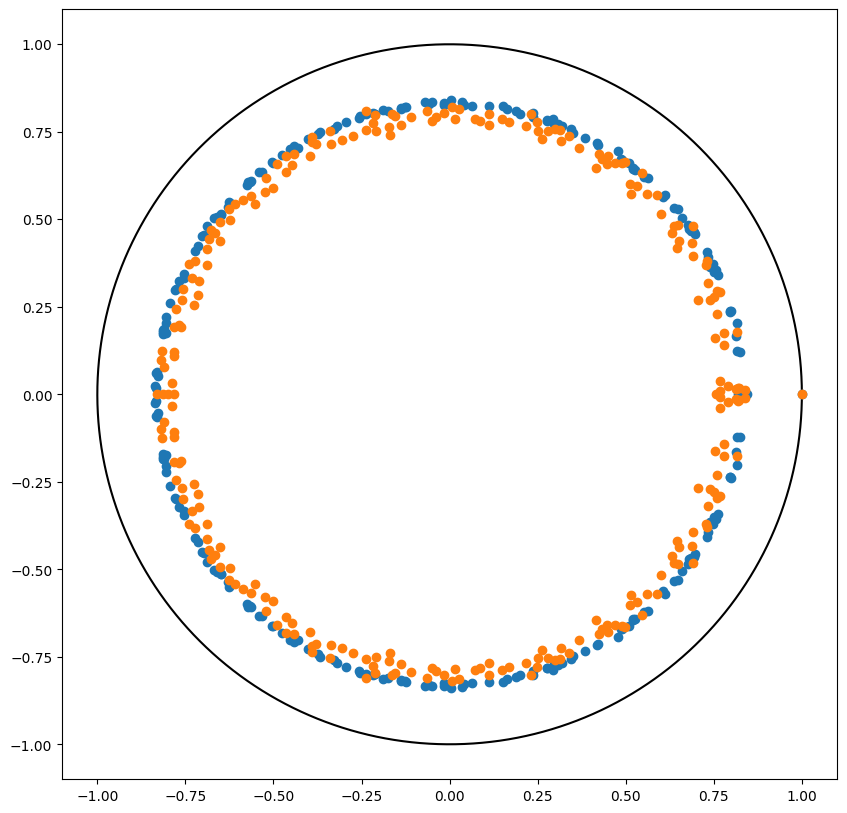

In [3]:
n = 4
d = 2**n

model = pkl.load(open("models/L=8.model", "rb"))
spectrum = channel_spectrum(model[0].channel)

map_test = DilutedKrausMap(U=generate_unitary(d), c=0.8, kraus_part=KrausMap(d, rank=1, trainable=False))
spectrum_test = channel_spectrum(map_test)

spectrum.plot_circle()
spectrum.plot()
spectrum_test.plot()
plt.show()

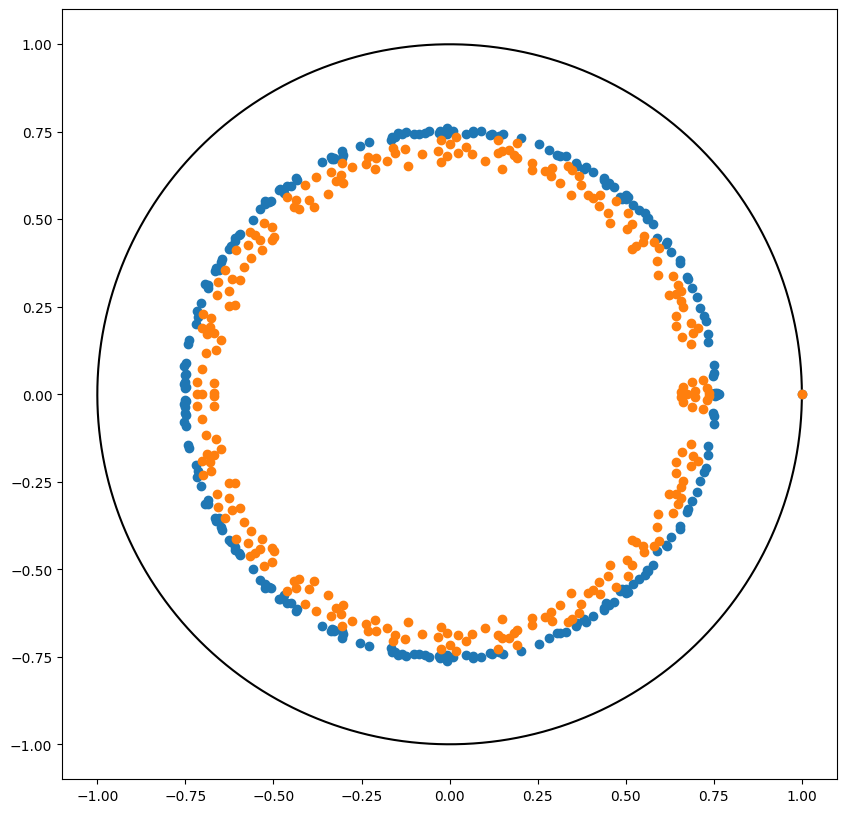

In [4]:
n = 4
d = 2**n

model = pkl.load(open("models/L=16.model", "rb"))
spectrum = channel_spectrum(model[0].channel)

map_test = DilutedKrausMap(U=generate_unitary(d), c=0.7, kraus_part=KrausMap(d, rank=2, trainable=False))
spectrum_test = channel_spectrum(map_test)

spectrum.plot_circle()
spectrum.plot()
spectrum_test.plot()
plt.show()

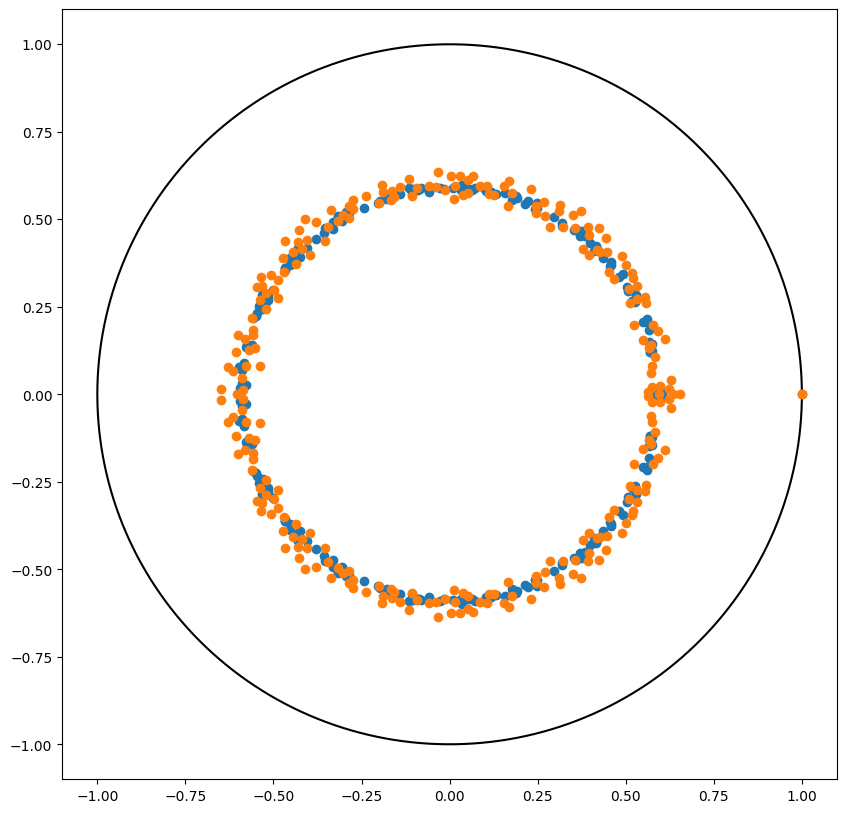

In [5]:
n = 4
d = 2**n

model = pkl.load(open("models/L=24.model", "rb"))
spectrum = channel_spectrum(model[0].channel)

map_test = DilutedKrausMap(U=generate_unitary(d), c=0.60, kraus_part=KrausMap(d, rank=4, trainable=False))
spectrum_test = channel_spectrum(map_test)

spectrum.plot_circle()
spectrum.plot()
spectrum_test.plot()
plt.show()

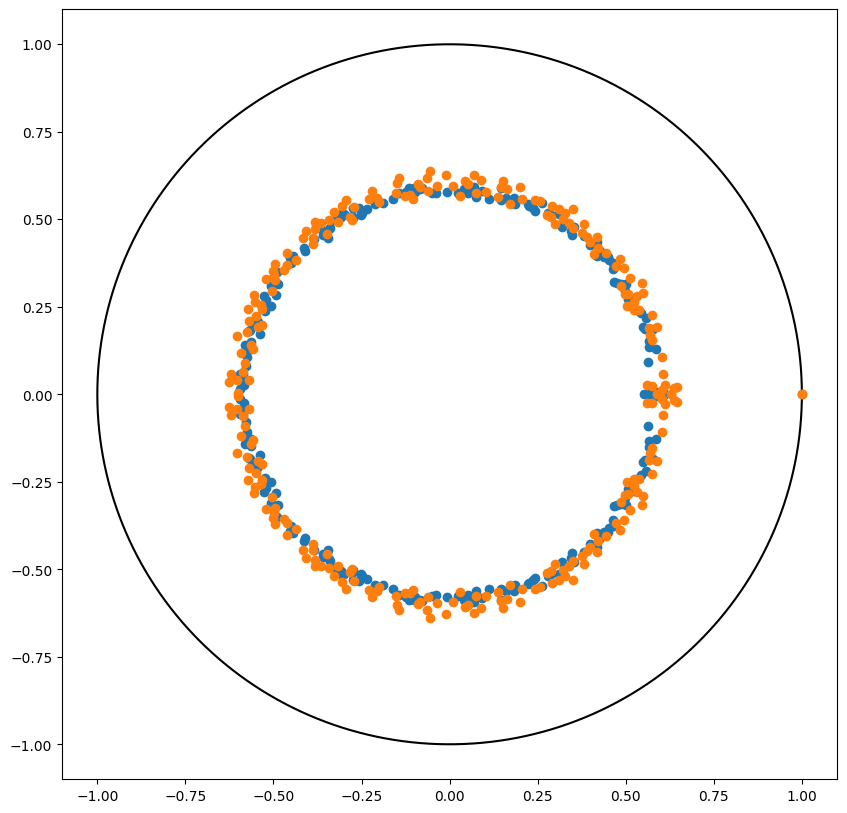

In [17]:
n = 4
d = 2**n

model = pkl.load(open("models/L=32.model", "rb"))
spectrum = channel_spectrum(model[0].channel)

map_test = DilutedKrausMap(U=generate_unitary(d), c=0.6, kraus_part=KrausMap(d, rank=5, trainable=False))
spectrum_test = channel_spectrum(map_test)

spectrum.plot_circle()
spectrum.plot()
spectrum_test.plot()
plt.show()

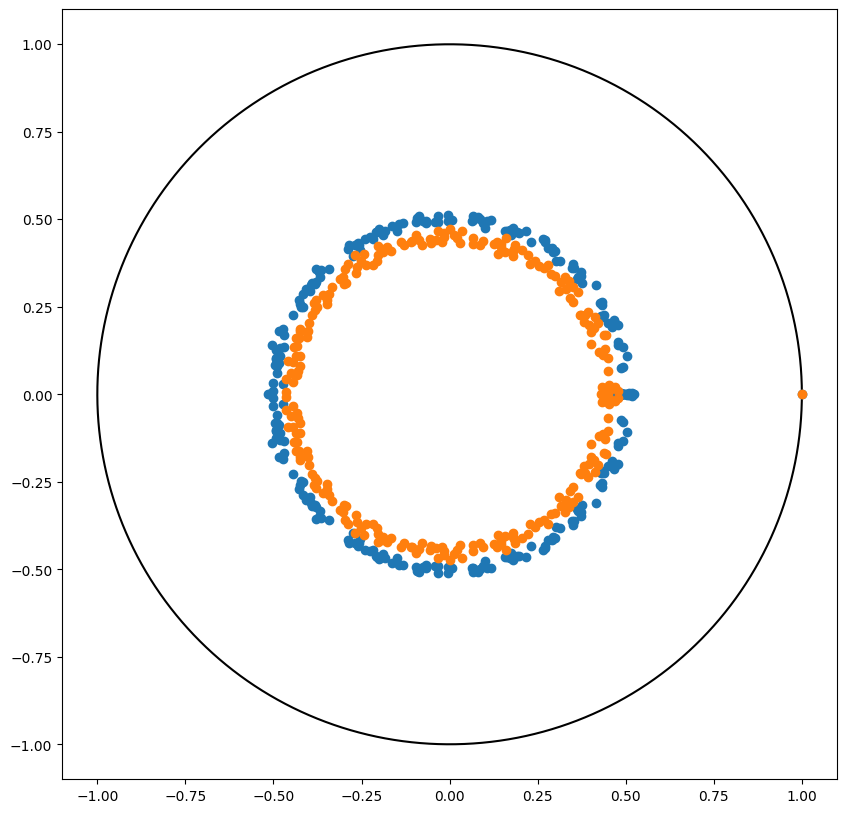

In [7]:
n = 4
d = 2**n

model = pkl.load(open("models/L=40.model", "rb"))
spectrum = channel_spectrum(model[0].channel)

map_test = DilutedKrausMap(U=generate_unitary(d), c=0.45, kraus_part=KrausMap(d, rank=16, trainable=False))
spectrum_test = channel_spectrum(map_test)

spectrum.plot_circle()
spectrum.plot()
spectrum_test.plot()
plt.show()

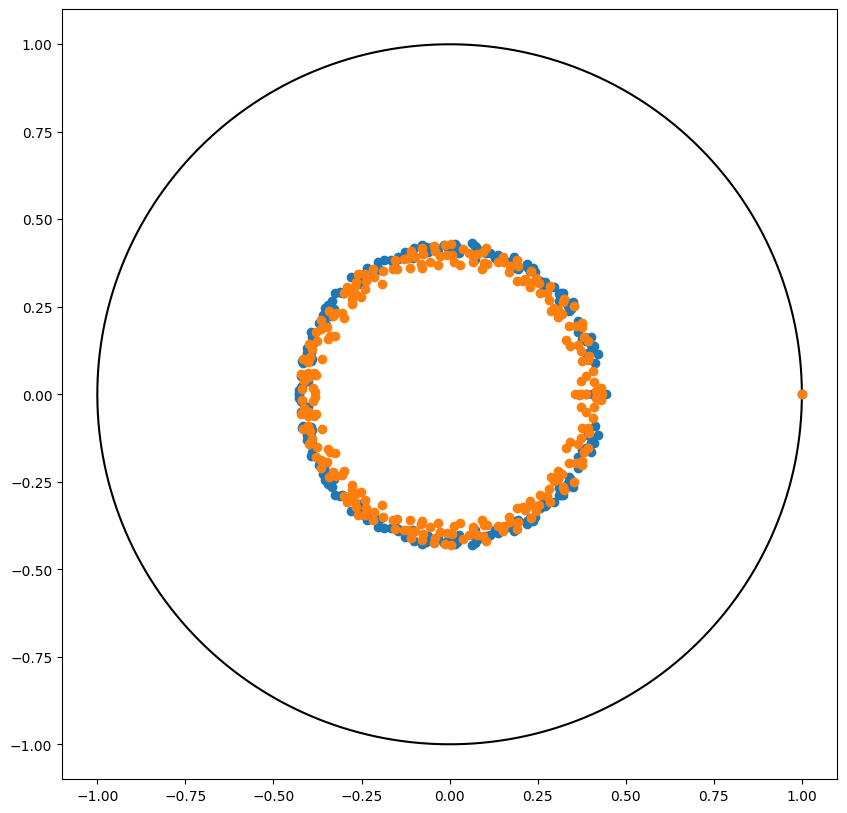

In [19]:
n = 4
d = 2**n

model = pkl.load(open("models/L=56.model", "rb"))
spectrum = channel_spectrum(model[0].channel)

map_test = DilutedKrausMap(U=generate_unitary(d), c=0.4, kraus_part=KrausMap(d, rank=15, trainable=False))
spectrum_test = channel_spectrum(map_test)

spectrum.plot_circle()
spectrum.plot()
spectrum_test.plot()
plt.show()

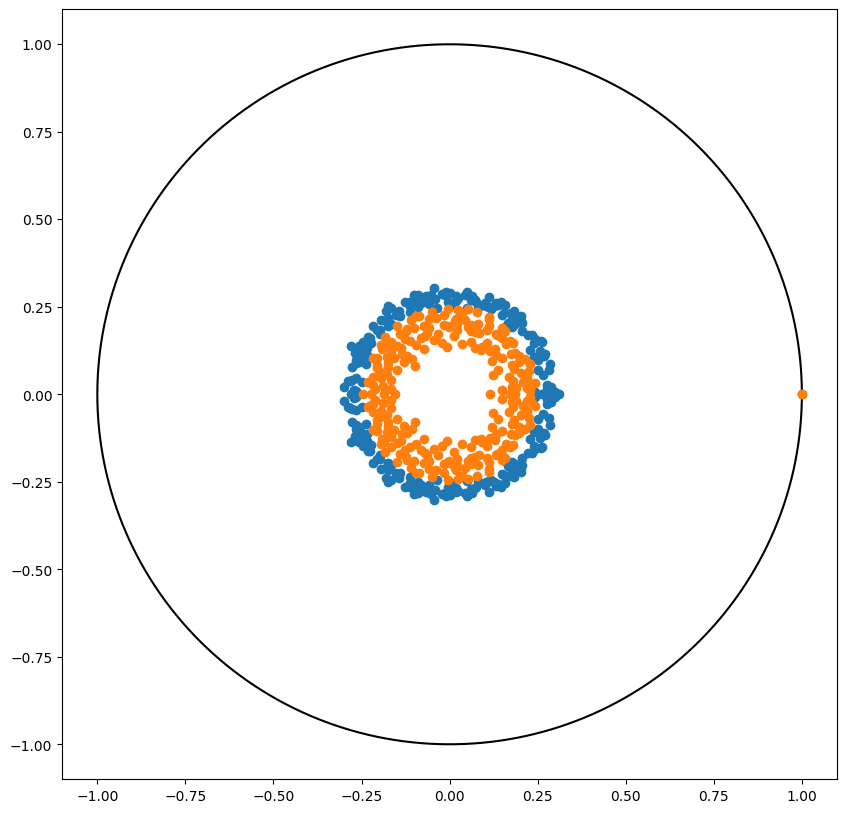

In [9]:
n = 4
d = 2**n

model = pkl.load(open("models/L=72.model", "rb"))
spectrum = channel_spectrum(model[0].channel)

map_test = DilutedKrausMap(U=generate_unitary(d), c=0.2, kraus_part=KrausMap(d, rank=30, trainable=False))
spectrum_test = channel_spectrum(map_test)

spectrum.plot_circle()
spectrum.plot()
spectrum_test.plot()
plt.show()

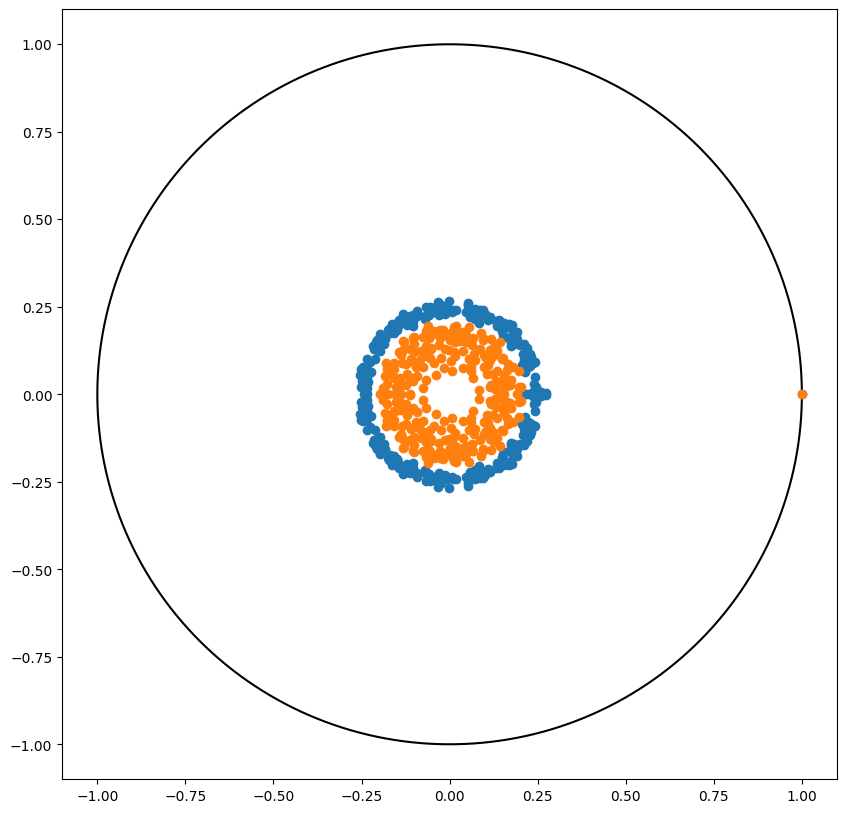

In [10]:
n = 4
d = 2**n

model = pkl.load(open("models/L=88.model", "rb"))
spectrum = channel_spectrum(model[0].channel)

map_test = DilutedKrausMap(U=generate_unitary(d), c=0.15, kraus_part=KrausMap(d, rank=40, trainable=False))
spectrum_test = channel_spectrum(map_test)

spectrum.plot_circle()
spectrum.plot()
spectrum_test.plot()
plt.show()

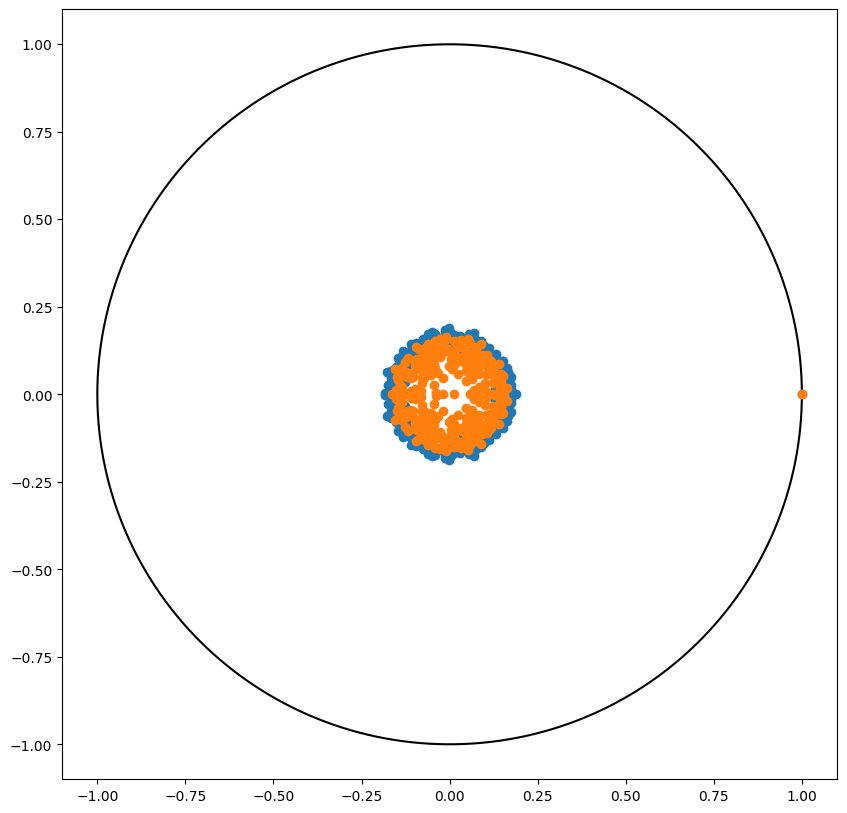

In [11]:
n = 4
d = 2**n

model = pkl.load(open("models/L=104.model", "rb"))
spectrum = channel_spectrum(model[0].channel)

map_test = DilutedKrausMap(U=generate_unitary(d), c=0.12, kraus_part=KrausMap(d, rank=60, trainable=False))
spectrum_test = channel_spectrum(map_test)

spectrum.plot_circle()
spectrum.plot()
spectrum_test.plot()
plt.show()

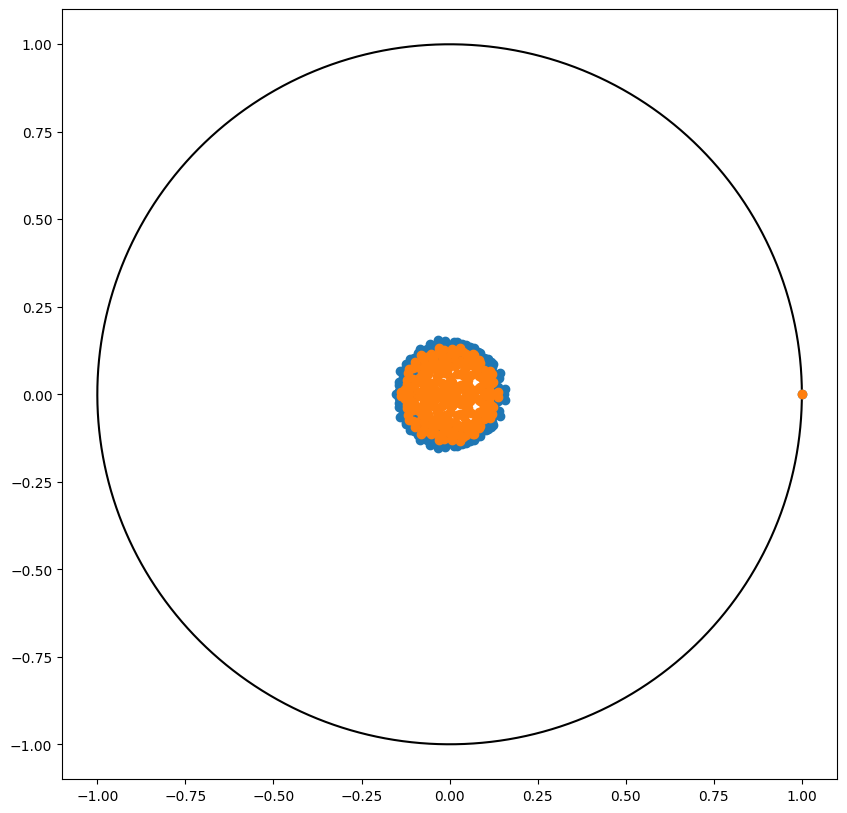

In [12]:
n = 4
d = 2**n

model = pkl.load(open("models/L=120.model", "rb"))
spectrum = channel_spectrum(model[0].channel)

map_test = DilutedKrausMap(U=generate_unitary(d), c=0.07, kraus_part=KrausMap(d, rank=60, trainable=False))
spectrum_test = channel_spectrum(map_test)

spectrum.plot_circle()
spectrum.plot()
spectrum_test.plot()
plt.show()